<a href="https://colab.research.google.com/github/AniketC24/Datascience/blob/main/Cement__Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Data Manipulatin Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data Preprocessing Library
from sklearn.preprocessing import StandardScaler

# Importing Data Filterwarning
import warnings
warnings.filterwarnings('ignore')

# Importing Logging
import logging
logging.basicConfig(level= logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s %(levelname)s %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [ ]:
# Importing Data using pandas function
df = pd.read_csv('/content/Concrete_Data - Concrete_Data.csv')

# It will print 100 & shuffle data
df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
616,277.0,0.0,0.0,191.0,0.0,968.0,856.0,360,33.70
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
808,252.0,0.0,0.0,186.0,0.0,1111.0,784.0,7,11.47
938,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
548,289.0,0.0,0.0,192.0,0.0,913.2,895.3,28,25.57
...,...,...,...,...,...,...,...,...,...
1016,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09
880,152.0,0.0,112.0,184.0,8.0,992.0,816.0,28,12.18
98,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7,55.60
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23


In [ ]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

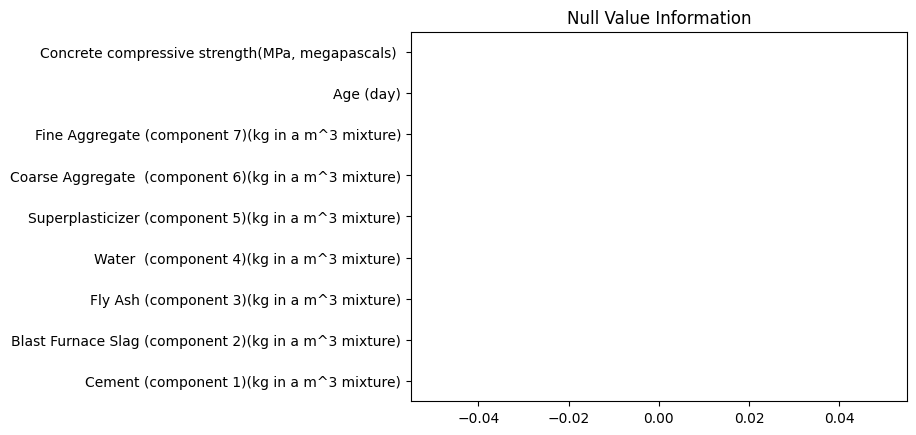

In [ ]:
# Checking Null Value Present in Dataset
df.isnull().sum().plot(kind=  'barh')
plt.title('Null Value Information')
plt.show()

In [ ]:
# Split the Dataset info Categorical and Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [ ]:
# 1. Univariate Analysis : EDA
def univariate_stats():
  from collections import OrderedDict

  stats = []

  for i in numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

  return report

ans = univariate_stats()
ans

,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),1030,102.00,540.0,281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,1030,0.00,359.4,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),1030,0.00,200.1,54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),1030,121.80,247.0,181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,1030,0.00,32.2,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1030,801.00,1145.0,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1030,594.00,992.6,773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),1030,1.00,365.0,45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",1030,2.33,82.6,35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [ ]:
# Step 1: Split the data into X and y
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)

y = df['Concrete compressive strength(MPa, megapascals) ']

In [ ]:
# Step 2: Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
# Step 3: Use Scaling Technique
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Model Building
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_LR)


0.5943782479239215

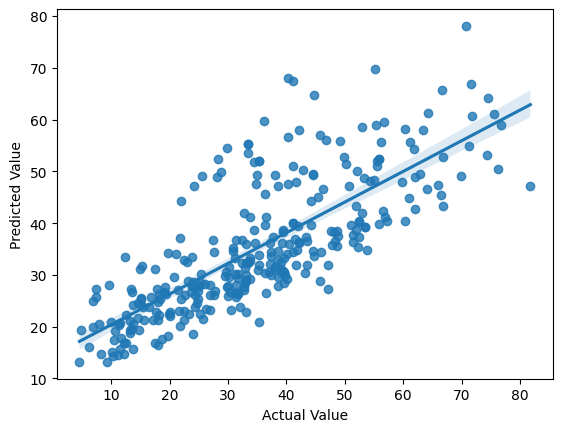

In [ ]:
sns.regplot(x = y_test, y = y_pred_LR)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [ ]:
LR.intercept_

np.float64(-13.616932642237444)

In [ ]:
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [ ]:
X.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

<Axes: >

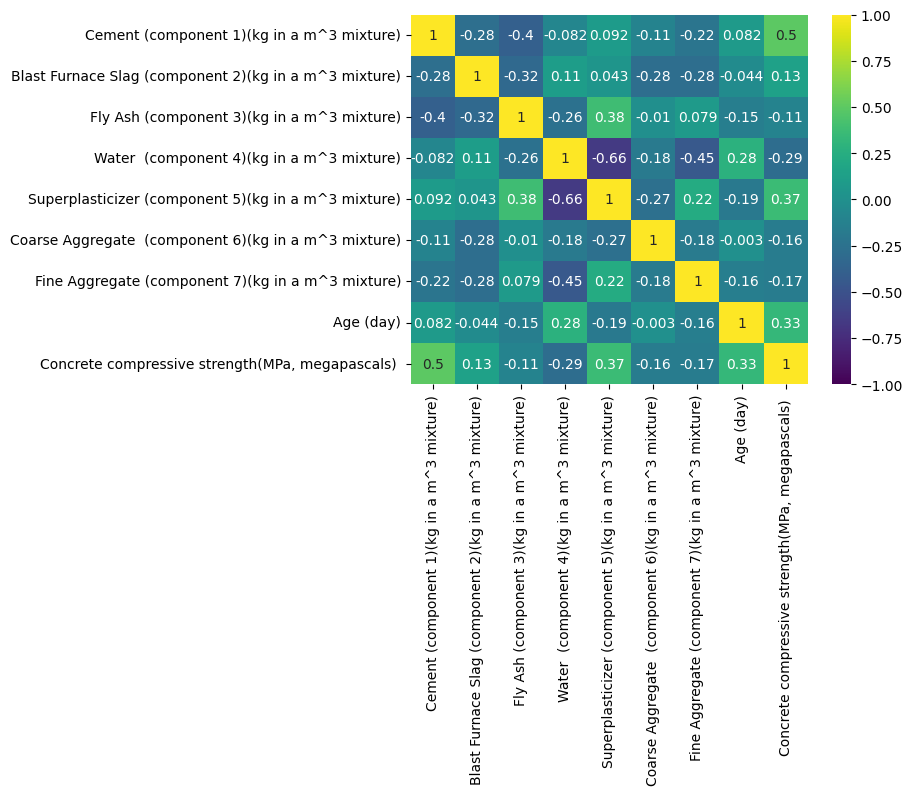

In [ ]:
sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1,center = 0, cmap = 'viridis')


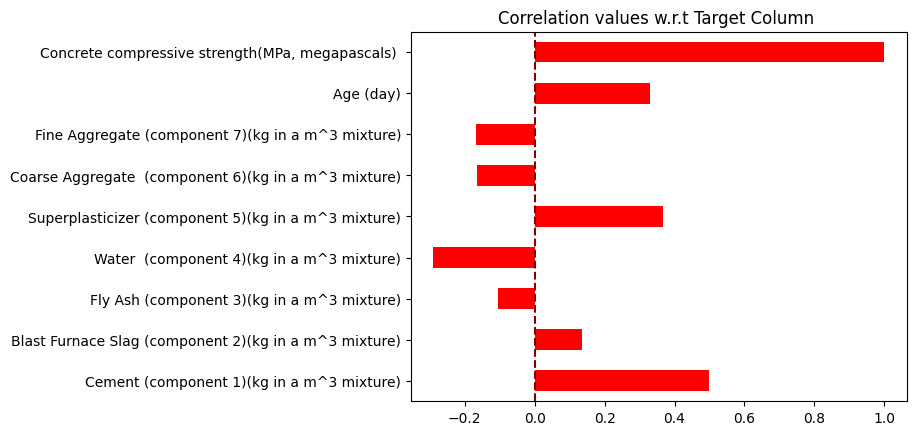

In [ ]:
df.corr() ['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',color = 'red')
plt.axvline(0,linestyle = '--',color = 'maroon')
plt.title('Correlation values w.r.t Target Column ')
plt.show()

In [ ]:
# Ridge and lasso

from sklearn.linear_model import Ridge, Lasso

Ridge = Ridge().fit(X_train,y_train)
y_pred_Ridge = Ridge.predict(X_test)

print(f'The Model accurancy for Ridge Regressor ',r2_score(y_test,y_pred_Ridge))

The Model accurancy for Ridge Regressor  0.595277347313935


In [ ]:
from sklearn.linear_model import Ridge, Lasso

Lasso = Lasso().fit(X_train,y_train)
y_pred_Lasso = Lasso.predict(X_test)

print(f'The Model accurancy for Ridge Regressor ',r2_score(y_test,y_pred_Lasso))

The Model accurancy for Ridge Regressor  0.1944637404527887


In [ ]:
# using Tree based Algorithm

from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print(f'The Model accurancy for Decision Tree Regressor ',r2_score(y_test,y_pred_DT))

The Model accurancy for Decision Tree Regressor  0.822409084317948


In [ ]:
# Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF = RandomForestRegressor().fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print(f'The Model accuracy for Random Forest Regressor:', r2_score(y_test, y_pred_RF))


The Model accuracy for Random Forest Regressor: 0.8810179491299892


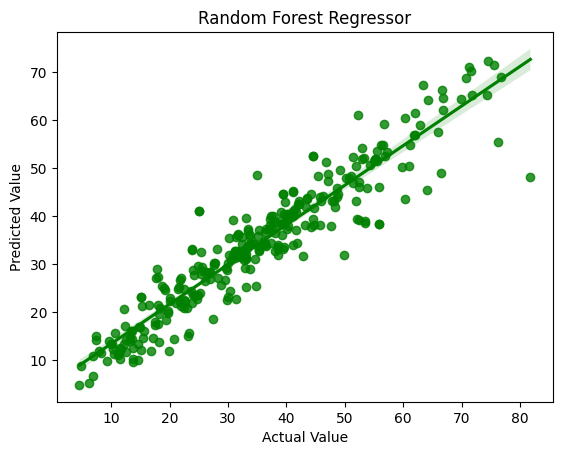

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=y_test, y=y_pred_RF, color='g')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Random Forest Regressor')
plt.show()


In [ ]:
# Using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GB = GB.predict(X_test)

print(f'The Model accurancy for Decision Tree Regressor ',r2_score(y_test,y_pred_GB))

The Model accurancy for Decision Tree Regressor  0.8909858948688202


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
AB = AdaBoostRegressor().fit(X_train,y_train)
y_pred_AB = AB.predict(X_test)

print(f'The Model accurancy for Decision Tree Regressor ',r2_score(y_test,y_pred_AB))

The Model accurancy for Decision Tree Regressor  0.7745389946033022


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

XGB = XGBRegressor().fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)

print(f'The Model accuracy for XGB Regressor:', r2_score(y_test, y_pred_XGB))


The Model accuracy for XGB Regressor: 0.9104444067517969


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

LGBM = LGBMRegressor().fit(X_train, y_train)
y_pred_LGBM = LGBM.predict(X_test)

print(f'The Model accuracy for LGBM Regressor:', r2_score(y_test, y_pred_LGBM))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 721, number of used features: 8
[LightGBM] [Info] Start training from score 36.152732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
# CatBoost Regressor
from catboost import CatBoostRegressor

CAT = CatBoostRegressor(verbose=0, random_state=42)
CAT.fit(X_train, y_train)
y_pred_CAT = CAT.predict(X_test)

print("CatBoost R²:", r2_score(y_test, y_pred_CAT))

CatBoost R²: 0.9337297660671403


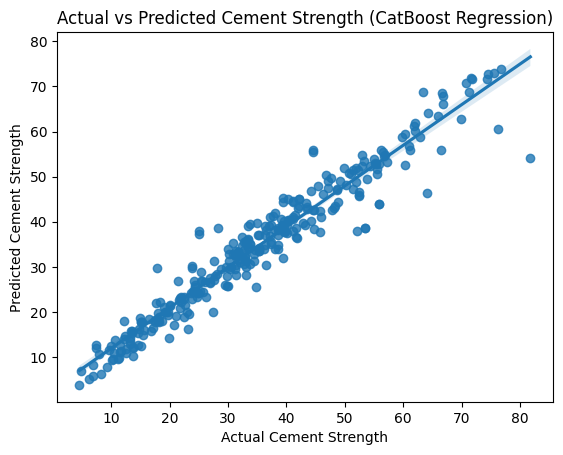

In [ ]:
sns.regplot(x=y_test, y=y_pred_CAT)
plt.xlabel('Actual Cement Strength')
plt.ylabel('Predicted Cement Strength')
plt.title('Actual vs Predicted Cement Strength (CatBoost Regression)')

plt.show()